## Linear regression model for the sale price of homes


Import the necessary libraries.

In [138]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# engine = create_engine("postgresql:///housing_prices")

# df = pd.read_sql("""
#     SELECT * 
#     FROM housing_data;
#     """, con = engine)

Load all the [data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) from three tables:
- Real Property Sales 
- Residential Building 
- Parcel 

In [187]:
df = pd.read_csv("data/processed/residential.csv")

In [189]:
df.sample(5)
df['sqftenclosedporch']

0       0
1       0
2       0
3       0
4       0
       ..
3136    0
3137    0
3138    0
3139    0
3140    0
Name: sqftenclosedporch, Length: 3141, dtype: int64

Turn strings into integers for the model.

In [117]:
df['porch'] = df['porch'].astype(int)
df['powerlines'] = df['powerlines'].astype(int)
df.sample(5)

,Unnamed: 0,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,ppage,platnbr,...,steepslopehazard,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems,years_ren_ago,porch
2179,2179,2922490,982670,1193,03/27/2018,710000,20180402001300,,,,...,N,N,N,N,N,N,N,N,0,0
1695,1695,2927062,137080,3110,04/19/2018,3450000,20180427001614,,,,...,N,N,N,N,N,N,N,N,0,1
2369,2369,2965677,312304,9272,11/29/2018,790000,20181211000800,,,,...,N,N,N,N,N,N,N,N,0,1
2499,2499,2969274,102504,9173,12/11/2018,760000,20190107000692,,,,...,N,N,N,N,N,N,N,N,0,1
1905,1905,2926850,252302,9084,04/02/2018,1500,20180427000738,,,,...,N,N,N,N,N,N,N,N,0,0


In [120]:
df['age'] = 2019 - df['yrbuilt']

In [124]:
df_direction = pd.get_dummies(df['directionprefix'], drop_first=True)
# # df.drop(['  ', 'E ', 'N ', 'NE', 'NW', 'S ', 'SE', 'SW', 'W '], axis=1, inplace=True)
df = pd.concat([df, df_direction], axis=1)

In [104]:
# direction = ['E ', 'N ', 'NE', 'NW', 'S ', 'SE', 'SW', 'W ']
# direction_series = pd.Series(direction)
# cat_direction = direction_series.astype('category')
# cat_direction

In [108]:
# direction = [df]
# onehotencoder = OneHotEncoder() 
# direction = onehotencoder.fit_transform(direction).toarray()

In [194]:
df_reduced0 = df[['sqfttotliving','porch', 'trafficnoise', 'powerlines', 'age']]
X = df_reduced0
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

KeyError: "['age'] not in index"

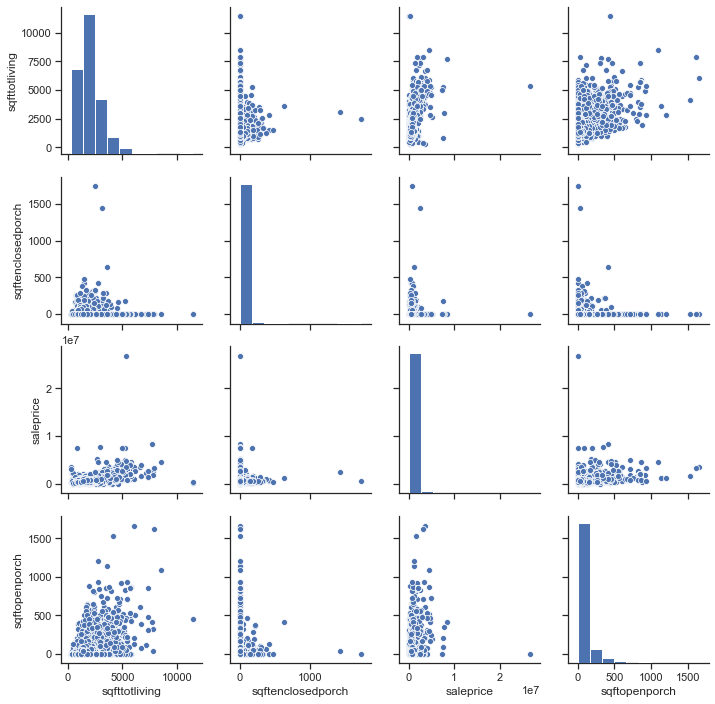

In [190]:
df_test = df[['sqfttotliving','sqftenclosedporch','saleprice', 'sqftopenporch']]
sns.set(style="ticks");
sns.pairplot(df_test)

## Sq ft of living


In [199]:
df_reduced05 = df[['sqfttotliving']]
X = df_reduced05
Y = df['saleprice']
# X_scaled = (X - np.mean(X)) / np.std(X)
# predictors = sm.add_constant(X_scaled)
predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          4.46e-193
Time:                        12:52:52   Log-Likelihood:                -46602.
No. Observations:                3141   AIC:                         9.321e+04
Df Residuals:                    3139   BIC:                         9.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.407e+04    2.6e+04      3.237      0.001    3.31e+04    1.35e+05
sqfttotliving   356.3584     11.191     31.844      0.000     334.416     378.300
==============================================================================
Omnibus:                     6617.626   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47245892.650
Skew:                          17.596   Prob(JB):                         0.00
Kurtosis:                     602.801   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
model.params

const            84068.963376
sqfttotliving      356.358403
dtype: float64

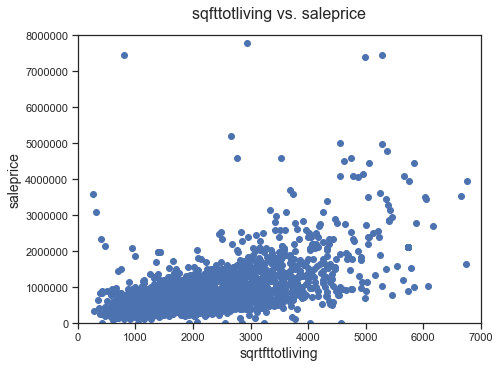

In [210]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('sqfttotliving vs. saleprice', fontsize=16)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([0,7000])
axes.set_ylim([0,8000000])
plt.scatter(df['sqfttotliving'], df['saleprice'])
plt.xlabel('sqrtfttotliving', fontsize=14)
plt.ylabel('saleprice', fontsize=14)
plt.show()

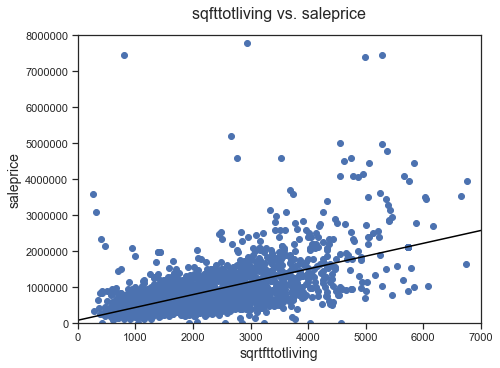

In [209]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('sqfttotliving vs. saleprice', fontsize=16)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([0,7000])
axes.set_ylim([0,8000000])
plt.scatter(df['sqfttotliving'], df['saleprice'])
list = range(10000)
plt.plot(list, model.params[0]+list*model.params[1], c='black')
plt.xlabel('sqrtfttotliving', fontsize=14)
plt.ylabel('saleprice', fontsize=14)
plt.show()

## Porch and size

In [212]:
df_open_plus_closed_porch = df['sqftenclosedporch'] + df['sqftopenporch']

In [214]:
df_reduced1 = pd.concat([df_reduced05, df_open_plus_closed_porch], axis=1)

In [249]:
df = pd.concat([df, df_open_plus_closed_porch], axis=1)
df.rename(columns={0:"open_plus_closed_porch"}, inplace=True)

In [250]:
# df.drop(['open_plus_closed_porch'], axis=1, inplace=True)
df

,Unnamed: 0,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,ppage,platnbr,...,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems,years_ren_ago,porch,open_plus_closed_porch
0,0,2915050,202504,9180,02/05/2018,1375000,,,,,...,N,N,N,N,N,N,N,0,1,50
1,1,2964304,277160,3830,11/19/2018,869000,20181130001050,,,,...,N,N,N,N,N,N,N,0,0,0
2,2,2947819,132305,9101,08/13/2018,713888,20180816000834,,,,...,N,N,N,N,N,N,N,10,1,260
3,3,2944206,242006,9208,07/19/2018,259950,,,,,...,N,N,N,N,N,N,N,0,0,0
4,4,2937353,193030,1530,06/19/2018,1090000,20180621000474,,,,...,N,N,N,N,N,N,N,0,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,2954619,868230,1510,09/25/2018,602000,20180927000959,,,,...,N,N,N,N,N,N,N,0,1,40
3137,3137,2932283,733460,1920,05/23/2018,438000,20180525001315,,,,...,N,N,N,N,N,N,N,0,0,0
3138,3138,2934230,789380,2170,06/04/2018,758000,20180605001279,,,,...,N,N,N,N,N,N,N,1,0,0
3139,3139,2941733,122403,9043,07/09/2018,695000,20180713000730,,,,...,N,N,N,N,N,N,N,0,0,0


In [245]:
df_reduced1.rename(columns={0:"open_plus_closed_porch"}, inplace=True)

In [251]:
X = df_reduced1
Y = df['saleprice']
# X_scaled = (X - np.mean(X)) / np.std(X)
# predictors = sm.add_constant(X_scaled)
predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     509.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.44e-192
Time:                        13:23:57   Log-Likelihood:                -46600.
No. Observations:                3141   AIC:                         9.321e+04
Df Residuals:                    3138   BIC:                         9.322e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9.182e+04   2.63e+04      3.498      0.000    4.04e+04    1.43e+05
sqfttotliving            345.3412     12.476     27.681      0.000     320.880     369.802
open_plus_closed_porch   176.4259     88.472      1.994      0.046       2.956     349.896
==============================================================================
Omnibus:                     6637.996   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48232040.659
Skew:                          17.720   Prob(JB):                         0.00
Kurtosis:                     609.036   Cond. No.                     5.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

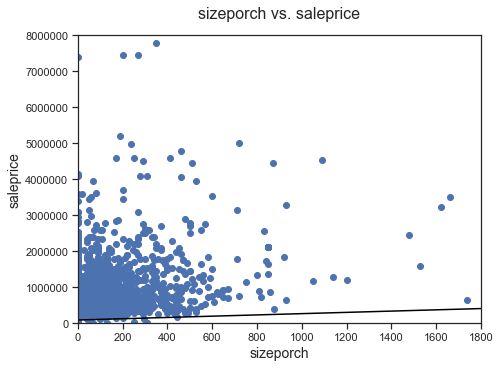

In [253]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('sizeporch vs. saleprice', fontsize=16)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([0,1800])
axes.set_ylim([0,8000000])
plt.scatter(df['open_plus_closed_porch'], df['saleprice'])
list = range(10000)
plt.plot(list, model.params[0]+list*model.params[2], c='black')
plt.xlabel('sizeporch', fontsize=14)
plt.ylabel('saleprice', fontsize=14)
plt.show()

In [111]:
df_reduced1 = df[['sqfttotliving','porch', 'trafficnoise', 'powerlines', 'age','years_ren_ago']]
X = df_reduced1
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          7.25e-192
Time:                        10:27:33   Log-Likelihood:                -46589.
No. Observations:                3141   AIC:                         9.319e+04
Df Residuals:                    3134   BIC:                         9.324e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.177e+05    1.2e+04     68.415      0.000    7.94e+05    8.41e+05
sqfttotliving  4.025e+05   1.31e+04     30.735      0.000    3.77e+05    4.28e+05
porch         -4938.7772   1.24e+04     -0.398      0.691   -2.93e+04    1.94e+04
trafficnoise   9548.9970    1.2e+04      0.796      0.426    -1.4e+04    3.31e+04
powerlines    -1.563e+04    1.2e+04     -1.307      0.191   -3.91e+04    7824.182
age            6.006e+04   1.29e+04      4.642      0.000    3.47e+04    8.54e+04
years_ren_ago -3720.6107   1.23e+04     -0.303      0.762   -2.78e+04    2.03e+04
==============================================================================
Omnibus:                     6598.944   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46649218.700
Skew:                          17.479   Prob(JB):                         0.00
Kurtosis:                     599.002   Cond. No.                         1.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sns.set(rc={'figure.figsize':(8, 8)})
# Use the .heatmap method to depict the relationships visually!
sns.heatmap(df.corr());

In [191]:
df_reduced3 = df[['sqfttotliving','sqftenclosedporch', 'sqftopenporch']]
X = df_reduced3
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     339.6
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          6.11e-191
Time:                        12:10:46   Log-Likelihood:                -46600.
No. Observations:                3141   AIC:                         9.321e+04
Df Residuals:                    3137   BIC:                         9.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.177e+05    1.2e+04     68.214      0.000    7.94e+05    8.41e+05
sqfttotliving      3.706e+05   1.37e+04     27.142      0.000    3.44e+05    3.97e+05
sqftenclosedporch  1.183e+04    1.2e+04      0.986      0.324   -1.17e+04    3.53e+04
sqftopenporch       2.41e+04   1.37e+04      1.765      0.078   -2672.228    5.09e+04
==============================================================================
Omnibus:                     6637.379   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48205771.796
Skew:                          17.717   Prob(JB):                         0.00
Kurtosis:                     608.870   Cond. No.                         1.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
df['wfntloc'] = np.where(df['wfntlocation'] != 0 , 1, 0)
df

,Unnamed: 0,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,ppage,platnbr,...,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems,years_ren_ago,porch,open_plus_closed_porch,wfntloc
0,0,2915050,202504,9180,02/05/2018,1375000,,,,,...,N,N,N,N,N,N,0,1,50,0
1,1,2964304,277160,3830,11/19/2018,869000,20181130001050,,,,...,N,N,N,N,N,N,0,0,0,0
2,2,2947819,132305,9101,08/13/2018,713888,20180816000834,,,,...,N,N,N,N,N,N,10,1,260,0
3,3,2944206,242006,9208,07/19/2018,259950,,,,,...,N,N,N,N,N,N,0,0,0,0
4,4,2937353,193030,1530,06/19/2018,1090000,20180621000474,,,,...,N,N,N,N,N,N,0,1,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,2954619,868230,1510,09/25/2018,602000,20180927000959,,,,...,N,N,N,N,N,N,0,1,40,0
3137,3137,2932283,733460,1920,05/23/2018,438000,20180525001315,,,,...,N,N,N,N,N,N,0,0,0,0
3138,3138,2934230,789380,2170,06/04/2018,758000,20180605001279,,,,...,N,N,N,N,N,N,1,0,0,0
3139,3139,2941733,122403,9043,07/09/2018,695000,20180713000730,,,,...,N,N,N,N,N,N,0,0,0,0


In [273]:
df_reduced4 = df[['sqfttotliving','open_plus_closed_porch','wfntfootage','trafficnoise','bedrooms']]
X = df_reduced4
Y = df['saleprice']
# X_scaled = (X - np.mean(X)) / np.std(X)
# predictors = sm.add_constant(X_scaled)
predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.99e-222
Time:                        14:42:28   Log-Likelihood:                -46522.
No. Observations:                3141   AIC:                         9.306e+04
Df Residuals:                    3135   BIC:                         9.309e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.179e+05   3.82e+04      5.697      0.000    1.43e+05    2.93e+05
sqfttotliving            378.3532     15.277     24.766      0.000     348.399     408.307
open_plus_closed_porch   148.1027     86.494      1.712      0.087     -21.488     317.693
wfntfootage             7009.0577    616.711     11.365      0.000    5799.860    8218.255
trafficnoise            2.484e+04   1.91e+04      1.302      0.193   -1.26e+04    6.22e+04
bedrooms               -6.402e+04    1.4e+04     -4.580      0.000   -9.14e+04   -3.66e+04
==============================================================================
Omnibus:                     6389.980   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40975321.579
Skew:                          16.206   Prob(JB):                         0.00
Kurtosis:                     561.603   Cond. No.                     7.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

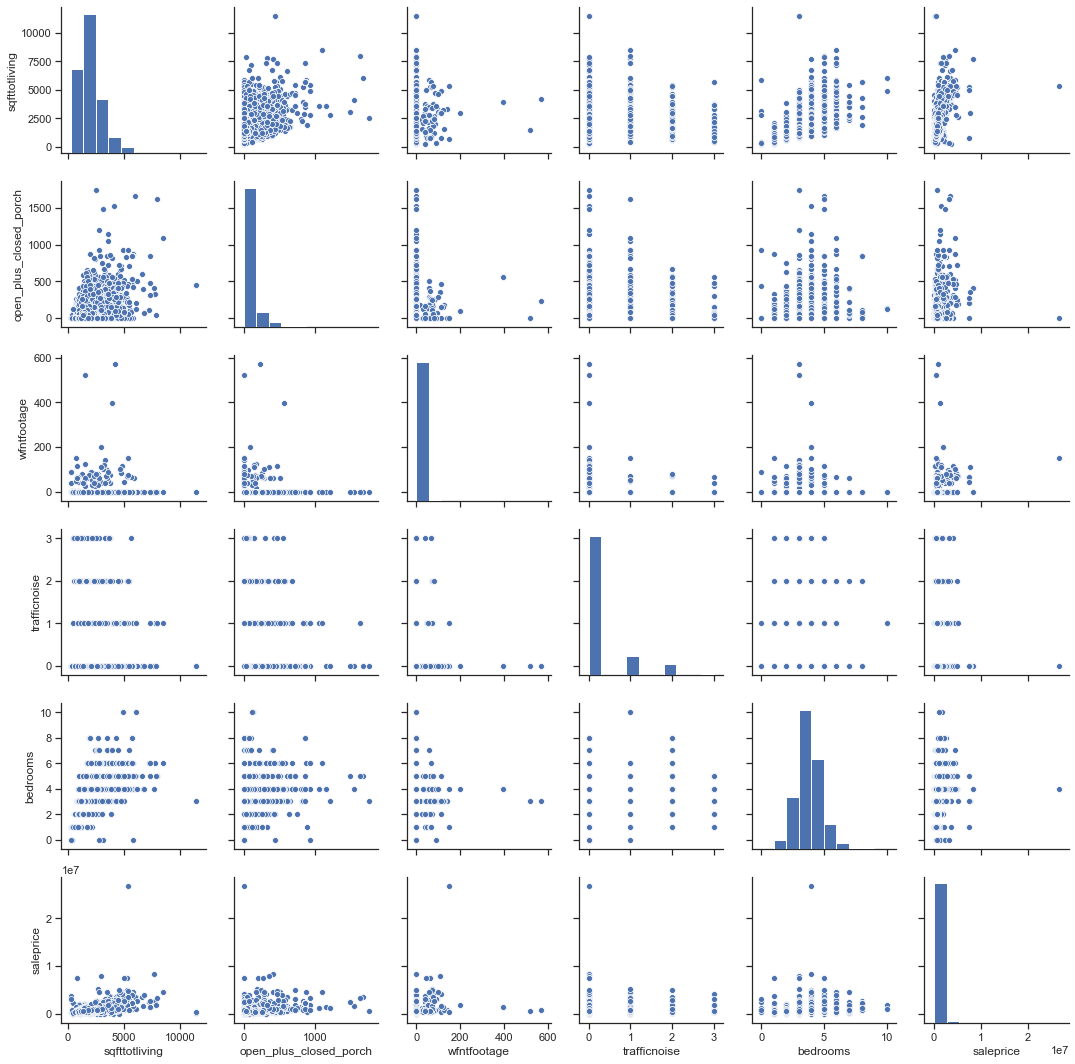

In [274]:
df_test4 = pd.concat([df_reduced4, df['saleprice']], axis=1)
sns.set(style="ticks");
sns.pairplot(df_test4)

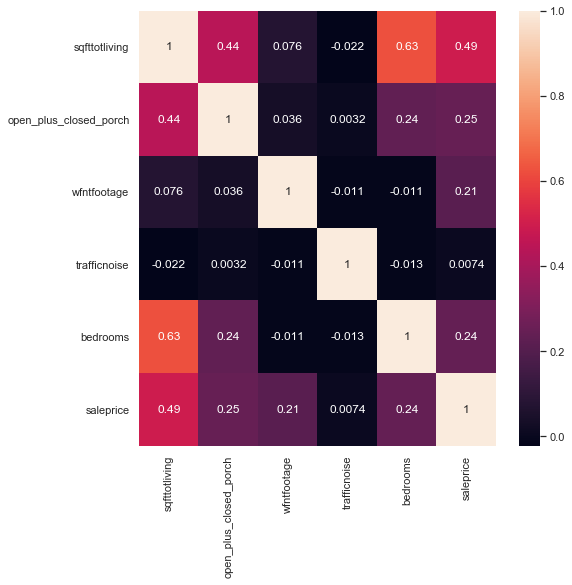

In [275]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.heatmap(df_test4.corr(), annot=True);

In [278]:
constant = model.params[0]
b1 = model.params[1] #sqfttotliving
b2 = model.params[2] #open_plus_closed_porch
b3 = model.params[3] #wfntfootage
b4 = model.params[4] #trafficnoise
b5 = model.params[5] #bedrooms


y_hat = constant + b1*df_reduced4['sqfttotliving'] + b2*df_reduced4['open_plus_closed_porch'] + b3*df_reduced4['wfntfootage'] + b4*df_reduced4['trafficnoise'] + b5*df_reduced4['bedrooms']
y_hat - df['saleprice']

0      -509416.283730
1      -249483.896079
2      -233391.243833
3       147688.306022
4      -204017.595989
            ...      
3136      4522.552249
3137     41825.369668
3138    172365.643849
3139     96913.959902
3140      6522.552249
Length: 3141, dtype: float64

In [281]:
model.params

const                     217861.793465
sqfttotliving                378.353211
open_plus_closed_porch       148.102721
wfntfootage                 7009.057659
trafficnoise               24840.103873
bedrooms                  -64020.092146
dtype: float64

In [279]:
b = []
for i in model.params:
    b.append(model.params[i])
    
b

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [217861.79346511935] of <class 'float'>